In [15]:
# Beast - no-beast 

import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
import numpy as np

In [30]:
species = glob.glob('*tsv')
 
np_array_list = []
for file_ in species:
    df = pd.read_csv(file_,index_col=None, header=0, sep="\t")
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
big_frame = pd.DataFrame(comb_np_array)

#big_frame.loc[big_frame[0] == '01_Natural_history'] = 'BEAST'
#big_frame.loc[big_frame[0] == '02_Nuisance_material'] = 'BEAST'
#big_frame.loc[big_frame[0] == '03_Nuisance_immaterial'] = 'BEAST'
#big_frame.loc[big_frame[0] == '05_Pest_control'] = 'BEAST'
#big_frame.loc[big_frame[0] == '06_Hunt_economical'] = 'BEAST'
#big_frame.loc[big_frame[0] == '08_Accidents'] = 'BEAST'
#big_frame.loc[big_frame[0] == '09_Figurative'] = 'BEAST'
#big_frame.loc[big_frame[0] == '10_Other_beast'] = 'BEAST'

big_frame

column_name = 0
mask = big_frame[0] == '01_Natural_history'
big_frame.loc[mask, column_name] = 'BEAST'

mask = big_frame[0] == '02_Nuisance_material'
big_frame.loc[mask, column_name] = 'BEAST'

mask = big_frame[0] == '03_Nuisance_immaterial'
big_frame.loc[mask, column_name] = 'BEAST'

mask = big_frame[0] == '05_Pest_control'
big_frame.loc[mask, column_name] = 'BEAST'

mask = big_frame[0] == '06_Hunt_economical'
big_frame.loc[mask, column_name] = 'BEAST'

mask = big_frame[0] == '08_Accidents'
big_frame.loc[mask, column_name] = 'BEAST'

mask = big_frame[0] == '09_Figurative'
big_frame.loc[mask, column_name] = 'BEAST'

mask = big_frame[0] == '10_Other_beast'
big_frame.loc[mask, column_name] = 'BEAST'

big_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,BEAST,MMSAB03:000067428:mpeg21:a0097:ocr,1939,Bredasche courant,BOSCH EN HEIDE BEDREIGD De heidevelden zijn op...,artikel,0.964211,nl,dan de verkoolde overblijfselen zoo spoedig mo...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Regionaal/lokaal,\N,\N
1,BEAST,MMSADB01:000008443:mpeg21:a0024:ocr,1910,Provinciale Noordbrabantsche en 's Hertogenbos...,LANDBOUW.,artikel,0.896774,nl,namens t taatsbosch beheer een lezing gehouden...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Regionaal/lokaal,\N,\N
2,BEAST,MMSAEN01:000051552:mpeg21:a0070:ocr,1933,Twentsch dagblad Tubantia en Enschedesche courant,Kunnen insectenplagen door de methode van bosc...,artikel,0.935897,nl,jonge aanplantingen steeds op haar post om haa...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Regionaal/lokaal,\N,\N
3,BEAST,ddd:010029309:mpeg21:a0243:ocr,1927,Nieuwe Rotterdamsche Courant,Wetenschappelijke Berichten. De bestrijding va...,artikel,0.818942,nl,van aanwending van deze stoffen £ schry£ m s&q...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Landelijk,\N,\N
4,BEAST,KBDDD02:000200891:mpeg21:a0057:ocr,1927,Voorwaarts,Dieren die geofferd worden De mol en de mode.,artikel,0.933333,nl,deze zijde ven het himalaya-gebergte voorkomt ...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Landelijk,\N,\N
5,BEAST,KBNRC01:000057072:mpeg21:a0081:ocr,1939,Algemeen Handelsblad,LAND VAN BEPROEVING door Edison Marshall,artikel,0.980097,nl,verder tijdens dien eersten langen dagmarsch l...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Landelijk,\N,\N
6,BEAST,MMCODA01:000156057:mpeg21:a0005:ocr,1931,Nieuwe Apeldoornsche courant,"Het moeras, dat zich niet temmen Iaat. Alle po...",artikel,0.964935,nl,van het moeras naar de huizen der boeren terug...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Regionaal/lokaal,\N,\N
7,BEAST,MMCODA01:000158525:mpeg21:a0062:ocr,1937,Nieuwe Apeldoornsche courant,GEMENGD BUITENLAND „Ook een schoolstrijd&quot;...,artikel,0.926916,nl,vrijgesproken rattenvanger gevraagd geheele s...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Regionaal/lokaal,\N,\N
8,BEAST,MMDA03:000111229:mpeg21:a0042:ocr,1915,Provinciale Drentsche en Asser courant,GEMENGD NIEUWS.,artikel,0.872581,nl,een klein gedeelte van die van den bliksem vol...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Regionaal/lokaal,\N,\N
9,BEAST,MMDA03:000115602:mpeg21:a0184:ocr,1938,Provinciale Drentsche en Asser courant,DE MUSKUSRAT,artikel,0.914474,nl,de =ANIMAL= de muskusrat de muskus of civetra...,"<div> <a target=""_blank"" href=""http://www.delp...",\N,Regionaal/lokaal,\N,\N


In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

#svc_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf-svm', LinearSVC(class_weight='balanced', C=1.0, verbose=True))])
#nb_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', MultinomialNB()),])
text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)),])
#knn_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='brute', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1))])


def customCrossValidation(X, y):
    ''' Perform a cross validation and print out the metrics '''
    skf = StratifiedKFold(n_splits=10)
    cm = None
    y_predicted_overall = None
    y_test_overall = None
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        text_clf.fit(X_train, y_train)
        y_predicted = text_clf.predict(X_test)
        # collect the y_predicted per fold
        if y_predicted_overall is None:
            y_predicted_overall = y_predicted
            y_test_overall = y_test
        else: 
            y_predicted_overall = np.concatenate([y_predicted_overall, y_predicted])
            y_test_overall = np.concatenate([y_test_overall, y_test])
        cv_cm = metrics.confusion_matrix(y_test, y_predicted)
        # sum the cv per fold
        if cm is None:
            cm = cv_cm
        else:
            cm += cv_cm
    print (metrics.classification_report(y_test_overall, y_predicted_overall, digits=3))
    print (cm)
    
customCrossValidation(big_frame[8], big_frame[0])



               precision    recall  f1-score   support

   11_Nobeast      0.929     0.916     0.923      4850
12_Bagger_OCR      0.667     0.008     0.017       239
        BEAST      0.902     0.959     0.930      4866

  avg / total      0.910     0.915     0.904      9955

[[4443    1  406]
 [ 138    2   99]
 [ 201    0 4665]]


In [42]:
newframe = big_frame[big_frame[0] != '12_Bagger_OCR'].reindex() #  df.drop(df.index[[1,3]], inplace=True)

newframe.index = range(len(newframe))

In [43]:
customCrossValidation(newframe[8], newframe[0])

             precision    recall  f1-score   support

 11_Nobeast      0.956     0.914     0.935      4850
      BEAST      0.918     0.958     0.938      4866

avg / total      0.937     0.936     0.936      9716

[[4432  418]
 [ 202 4664]]


In [54]:
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', MultinomialNB()),])

def customCrossValidation(X, y):
    ''' Perform a cross validation and print out the metrics '''
    skf = StratifiedKFold(n_splits=10)
    cm = None
    y_predicted_overall = None
    y_test_overall = None
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        text_clf.fit(X_train, y_train)
        y_predicted = text_clf.predict(X_test)
        # collect the y_predicted per fold
        if y_predicted_overall is None:
            y_predicted_overall = y_predicted
            y_test_overall = y_test
        else: 
            y_predicted_overall = np.concatenate([y_predicted_overall, y_predicted])
            y_test_overall = np.concatenate([y_test_overall, y_test])
        cv_cm = metrics.confusion_matrix(y_test, y_predicted)
        # sum the cv per fold
        if cm is None:
            cm = cv_cm
        else:
            cm += cv_cm
    print (metrics.classification_report(y_test_overall, y_predicted_overall, digits=3))
    print (cm)
    
#customCrossValidation(newframe[8], newframe[0])


In [56]:
customCrossValidation(newframe[8], newframe[0])

             precision    recall  f1-score   support

 11_Nobeast      0.980     0.878     0.926      4850
      BEAST      0.890     0.982     0.933      4866

avg / total      0.934     0.930     0.930      9716

[[4257  593]
 [  89 4777]]


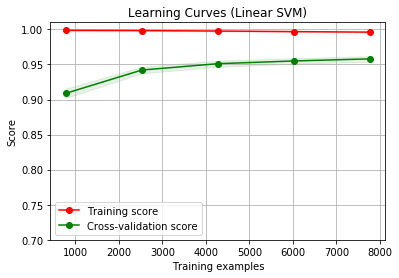

In [44]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf-svm', LinearSVC(class_weight='balanced', C=1.0, verbose=True))])
X, y = newframe[8], newframe[0]

title = "Learning Curves (Linear SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = text_clf
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()


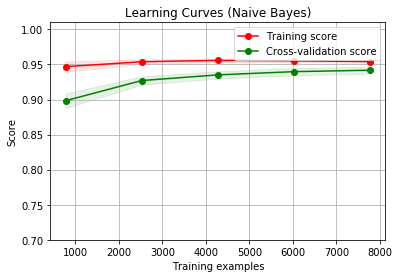

In [45]:
nb_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', MultinomialNB()),])

title = "Learning Curves (Naive Bayes)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = nb_clf
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

TypeError: 'tuple' object is not callable